Consider a collection on wine quality. You can find it here:<br>
https://archive.ics.uci.edu/ml/datasets/Wine+Quality<br>
a. Prepare an analysis of the data.<br>
b. Prepare a classification on wine quality. Use the logistic regression logistic.<br>
c. Compare the results on test and learning data. If they differ significantly apply<br>
appropriate regularization.<br>
d. Present the results using all metrics you have learned, including visual ones.<br>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

The dataset Wine Quality Data Set contains two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For this task i will use the red wine dataset. The red wine dataset has 4898 rows and 12 columns. Using the info() method, we can find out that the dataset does not contain missing data.

In [26]:
data_frame = pd.read_csv('./winequality-red.csv', sep = ';')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Features
Input variables (based on physicochemical tests):<br>
1 - fixed acidity -  - numerical data <br>
2 - volatile acidity - the amount of acetic acid in wine - numerical data<br>
3 - citric acid - can add ‘freshness’ and flavor to wines numerical data<br>
4 - residual sugar - the amount of sugar remaining after fermentation stops - numerical data<br>
5 - chlorides - the amount of salt in the wine - numerical data<br>
6 - free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine - numerical data<br>
7 - total sulfur dioxide - mount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine - numerical data<br>
8 - density - numerical data<br>
9 - pH - pH value of wine, most wines are between 3-4 on the pH scale - numerical data<br>
10 - sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant - numerical data<br>
11 - alcohol - the percent alcohol content of the wine - numerical data<br><br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10) - categorical data

Let's take a look on features distribiution. I will plot boxplot for all of them using `subplot2grid` to easily compare them, and have a quick look.

In [27]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


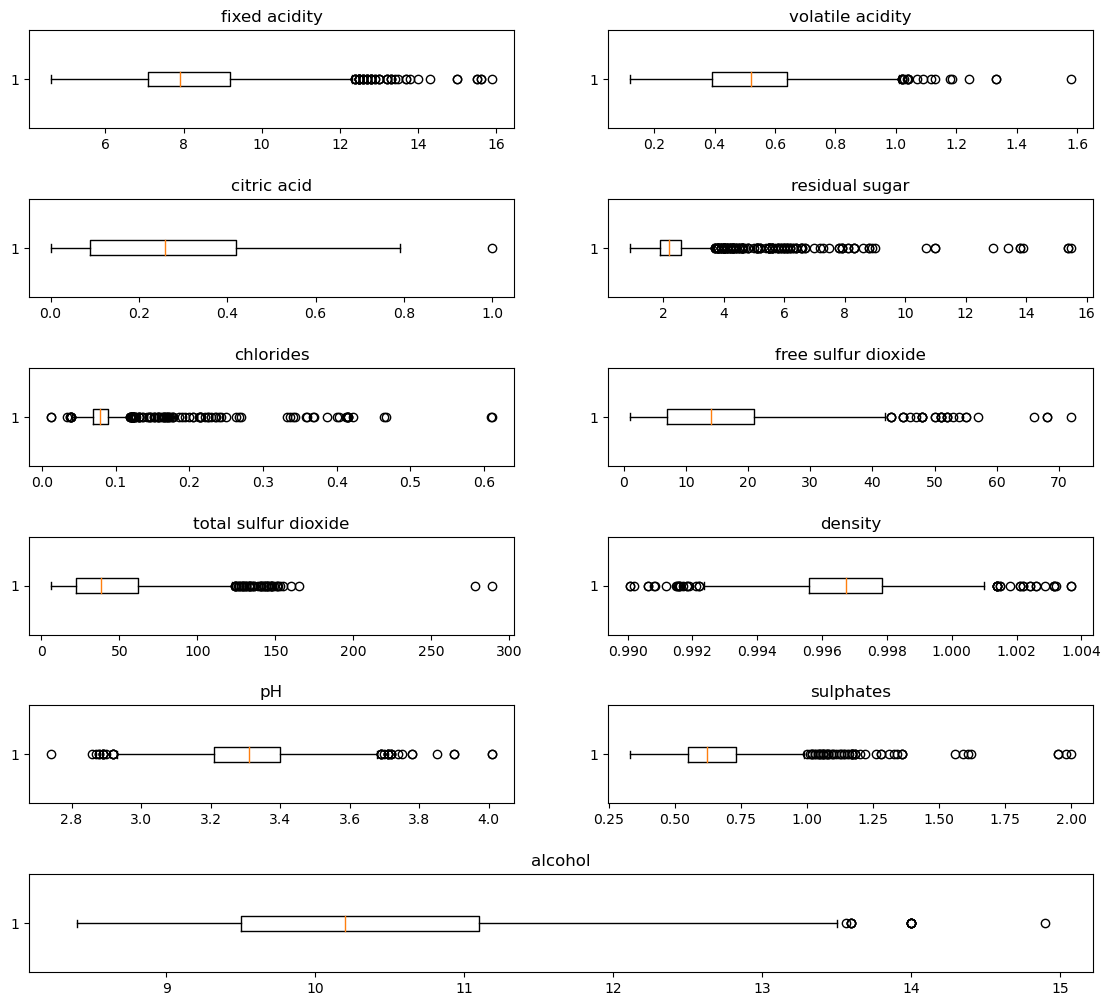

In [28]:
plt.figure(figsize=(12,12))
ax0 = plt.subplot2grid((7, 2), (0, 0), colspan=1)
ax1 = plt.subplot2grid((7, 2), (0, 1), colspan=1)
ax2 = plt.subplot2grid((7, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((7, 2), (1, 1), colspan=1)
ax4 = plt.subplot2grid((7, 2), (2, 0), colspan=1)
ax5 = plt.subplot2grid((7, 2), (2, 1), colspan=1)
ax6 = plt.subplot2grid((7, 2), (3, 0), colspan=1)
ax7 = plt.subplot2grid((7, 2), (3, 1), colspan=1)
ax8 = plt.subplot2grid((7, 2), (4, 0), colspan=1)
ax9 = plt.subplot2grid((7, 2), (4, 1), colspan=1)
ax10 = plt.subplot2grid((7, 2), (5, 0), colspan=2)
plt.tight_layout(pad=3)

feature_cols = list(data_frame.drop('quality', axis=1).columns)
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for ax, feature in zip(axes, feature_cols):
    ax.boxplot(data_frame[feature],vert=False)
    ax.set_title(feature)

From the above boxplots we can infer that almost every feature has a large amount of outliers. There are only two variables that don't have many outliers: citric acid and alcohol.

Checking the same with the histogram for each feature, we can see that pH and density distribiutions looks like a normal distribiution.
<br>
When I was looking for the information about variables in the dataset I found the information that most wines are between 3-4 on the pH scale. Let's check if wines in the dataset are also on the same scale.

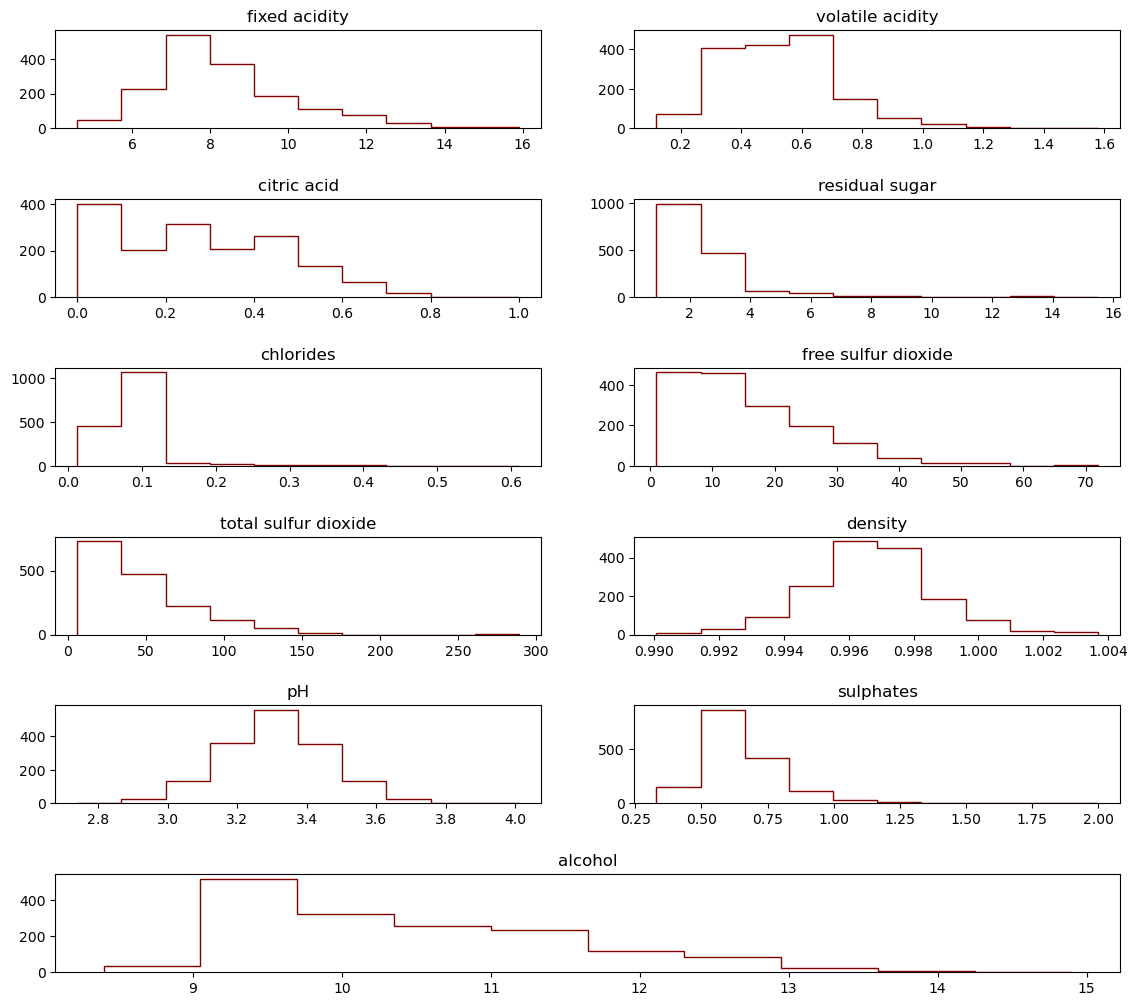

In [29]:
plt.figure(figsize=(12,12))
ax0 = plt.subplot2grid((7, 2), (0, 0), colspan=1)
ax1 = plt.subplot2grid((7, 2), (0, 1), colspan=1)
ax2 = plt.subplot2grid((7, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((7, 2), (1, 1), colspan=1)
ax4 = plt.subplot2grid((7, 2), (2, 0), colspan=1)
ax5 = plt.subplot2grid((7, 2), (2, 1), colspan=1)
ax6 = plt.subplot2grid((7, 2), (3, 0), colspan=1)
ax7 = plt.subplot2grid((7, 2), (3, 1), colspan=1)
ax8 = plt.subplot2grid((7, 2), (4, 0), colspan=1)
ax9 = plt.subplot2grid((7, 2), (4, 1), colspan=1)
ax10 = plt.subplot2grid((7, 2), (5, 0), colspan=2)
plt.tight_layout(pad=3)

feature_cols = list(data_frame.drop('quality', axis=1).columns)
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for ax, feature in zip(axes, feature_cols):
    ax.hist(data_frame[feature], histtype='step', color='#800000')
    ax.set_title(feature)

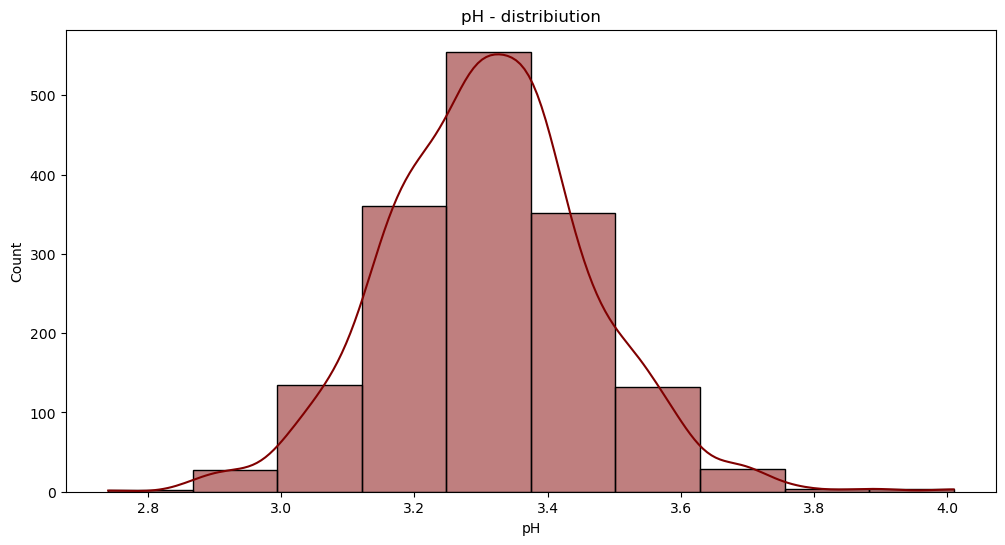

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(x=data_frame['pH'],data=data_frame,bins=10,kde=True, color='#800000')
plt.title('pH - distribiution')
plt.show()

As we can see from the histplot above, the distribution of the pH of the wine samples is close to a normal distribution. The observations are from a range of 2.8 - 3.8 with the largest number between 3 - 3,4.

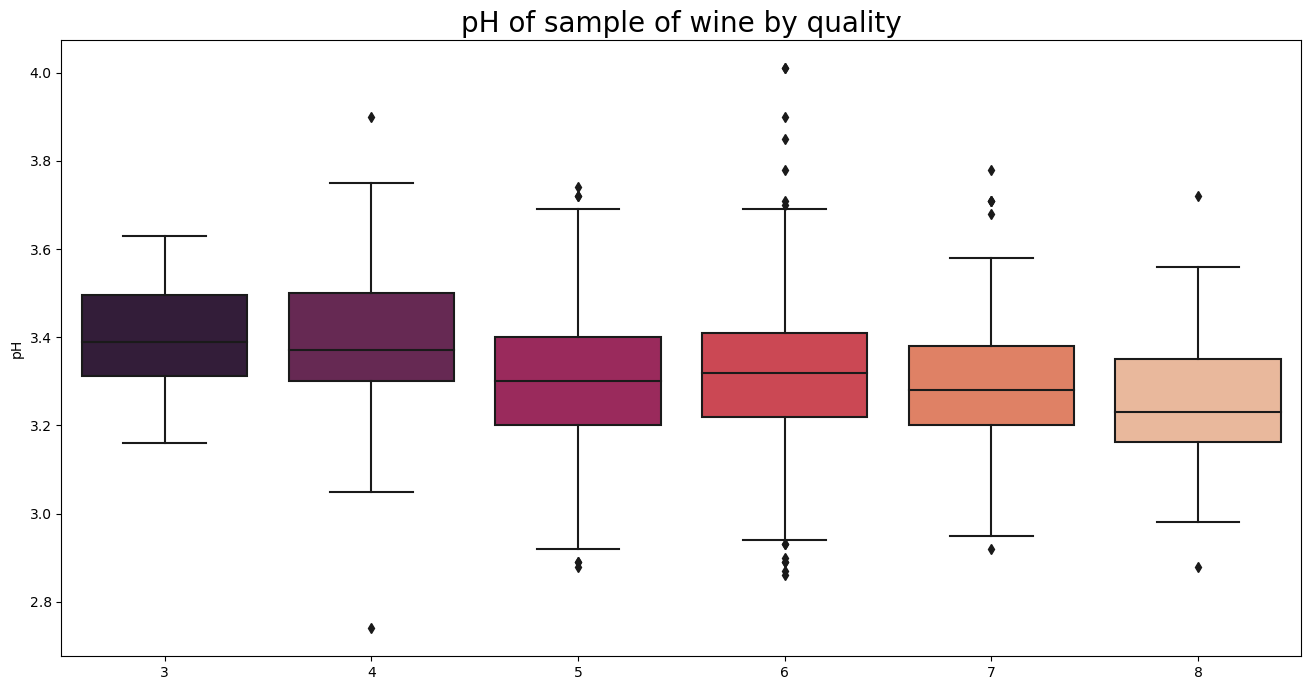

In [31]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='quality', y='pH', data=data_frame, palette="rocket")
plt.xlabel(None)
plt.title('pH of sample of wine by quality', size=20)
plt.show()

From the above boxplot we can infer that the wine sample with the best score have lower pH. 

### Wine sample's quality
The last column is the column "Quality" with categorical data, where each sample of wine was rated between 0 and 10. Let's check how data in the column looks.

In [32]:
#check unique values in the "quality" column
pd.unique(data_frame['quality'])

array([5, 6, 7, 4, 8, 3])

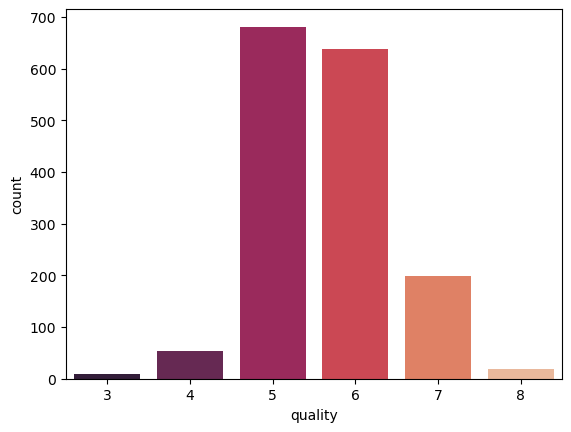

In [33]:
#plot the "quality" column
ax = sns.countplot(x='quality', data=data_frame, palette="rocket")
plt.show()

In [34]:
#count values in the "quality" column
quality = data_frame['quality'].value_counts()
quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In the last column, "quality" each wine sample was rated between 0 and 10, but from the above barplot and table we can infer that there were no ratings of 0, 1, 2 and 10. The most freqently rating was 6 (2198 samples), then 5 (1457 samples) and 4 (880 samples). The fewest rating was 9 (only 5 samples).The sample sizes are unequal.<br><br> 
Now, before I create the logistic I will conduct a feature selection.

In [35]:
#feature selection
X = data_frame[feature_cols]
y = data_frame['quality']
estimator = ExtraTreesClassifier(n_estimators = 100)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(X, y)

SelectFromModel(estimator=ExtraTreesClassifier())

In [36]:
selectedFeatures = featureSelection.transform(X)

In [37]:
selectedFeatures

array([[ 0.7  , 34.   ,  0.56 ,  9.4  ],
       [ 0.88 , 67.   ,  0.68 ,  9.8  ],
       [ 0.76 , 54.   ,  0.65 ,  9.8  ],
       ...,
       [ 0.51 , 40.   ,  0.75 , 11.   ],
       [ 0.645, 44.   ,  0.71 , 10.2  ],
       [ 0.31 , 42.   ,  0.66 , 11.   ]])

In [38]:
#names of the selected features
X.columns[featureSelection.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')

In [39]:
selected_features = selectedFeatures

In [40]:
#create the logistic regression model using "clas_weight=balanced" beacuse of unequeal sample size
logistic = LogisticRegression(class_weight='balanced')
scaler = StandardScaler()

In [41]:
# create a pipeline to first scall the data and then to apply the logist regression on the scalled data
pipe = Pipeline([("scaler", scaler), ("logistic", logistic)])

In [42]:
#split data to the train data and test data datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.33, random_state=42)

In [43]:
pipe.fit(X_train, y_train)#fit model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [44]:
y_pred = pipe.predict(X_test)#predict

### Accuracy score

In [45]:
#score the train data
score_train = pipe.score(X_train, y_train)
print(score_train)

0.39869281045751637


In [46]:
#score the test data
score_test = pipe.score(X_test, y_test)
print(score_test)

0.4053030303030303


The accuracy score for both - the train and the test data is about 0,4 which is I would say poor, beacuse it means that the model correctly predicted 40% of the instances in the dataset, while it failed to make accurate predictions for the remaining 60% of the instances.
### Clasification report
A classification report is a tool used to evaluate the performance of a classification model, which predicts a categorical outcome. It typically includes metrics such as precision, recall, F1-score, and support.

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.03      1.00      0.06         2
           4       0.06      0.16      0.09        19
           5       0.71      0.50      0.58       217
           6       0.55      0.31      0.40       213
           7       0.33      0.41      0.37        70
           8       0.10      0.71      0.17         7

    accuracy                           0.41       528
   macro avg       0.30      0.52      0.28       528
weighted avg       0.56      0.41      0.46       528



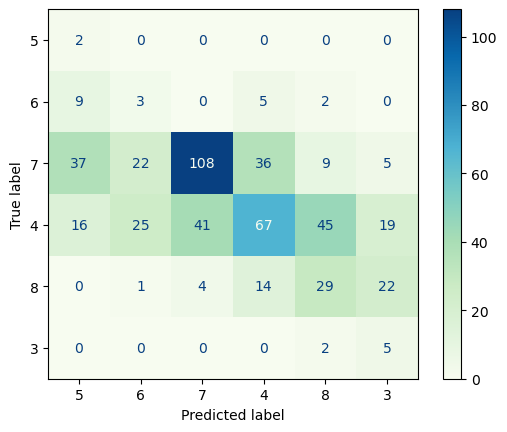

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data_frame['quality']))
disp.plot(cmap='GnBu') 
plt.show()

### ROC curve
Receiver Operating Characteristic (ROC) helps evaluate the quality of multiclass classifiers.
I will try to plot ROC curve for each class on the same plot.

In [49]:
#use a LabelBinarizer to binarize the target by one-hot-encoding
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(528, 6)

In [50]:
#check LabelBinarizer for classifier "6".
label_binarizer.transform([6])

array([[0, 0, 0, 1, 0, 0]])

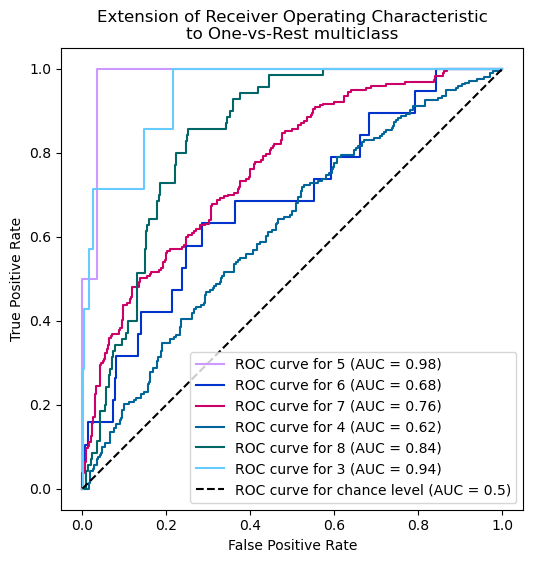

In [51]:
#plot
fig, ax = plt.subplots(figsize=(6, 6))
y_score = pipe.fit(X_train, y_train).predict_proba(X_test)
target_names = pd.unique(data_frame['quality'])
n_classes = 6

colors = cycle(["#cc99ff", "#0033cc", "#cc0066", '#006699', '#006666', '#66ccff'])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

    
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()    

Classifiers that give curves closer to the top-left corner indicate a better performance, so in my model the best performance has the classifier is "5", next "3" and 8. The worst classifier is "4".
<br>
Since the logistic regression model has a poor quality I wanted to do something about it. I suspected that the poor performance came from the unequal samples - imbalanced cllasses - while the largest group has almost 700 observations, the smallest has only 10 so maybe this is the cause. There is no way to collect additional data for classes that have a small number of observations, oversample the minority class also doesn't seem be a good solution here. So I decided to combine classes and indesad of 6 I will create only three classes: "low", "medium" and "high" and then I will check the quality of the model again.

In [52]:
#copy dataframe
data_frame2 = data_frame.copy()

In [53]:
#replace values in the "quality" columns withe the new three class
data_frame2 = data_frame2.replace([3, 4], 0)#low
data_frame2 = data_frame2.replace([5, 6], 1)#medium
data_frame2 = data_frame2.replace([7, 8], 2)#high

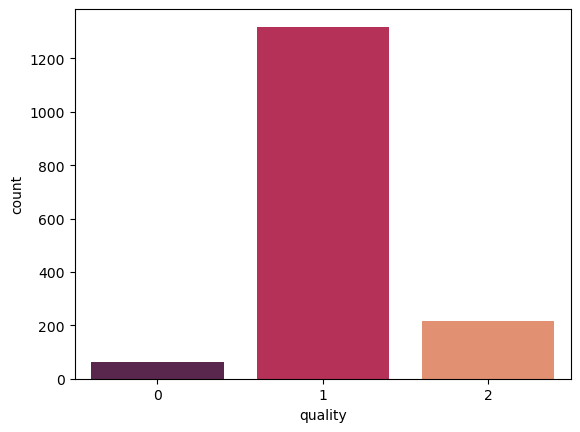

In [54]:
#plot the new "quality" column
ax = sns.countplot(x='quality', data=data_frame2, palette="rocket")
plt.show()

In [55]:
#count values in the "quality" column
quality = data_frame2['quality'].value_counts()
quality

1    1319
2     217
0      63
Name: quality, dtype: int64

Unfortunately, there are still considerable inequalities in group sizes, the classes are still imbalanced. The largest group 1 - "medium" has 1319 observations while the smallest only 63.

In [56]:
#feature selection
X_2 = data_frame2[feature_cols]
y_2 = data_frame2['quality']
estimator_2 = ExtraTreesClassifier(n_estimators = 100)
featureSelection_2 = SelectFromModel(estimator_2)
featureSelection_2.fit(X_2, y_2)

SelectFromModel(estimator=ExtraTreesClassifier())

In [57]:
selectedFeatures_2 = featureSelection_2.transform(X_2)

In [58]:
#names of the selected features
X_2.columns[featureSelection_2.get_support()]

Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')

In [59]:
selected_features_2 = selectedFeatures_2

In [60]:
#create the second logistic regression model for the news classes
logistic_2 = LogisticRegression(class_weight='balanced')
scaler_2 = StandardScaler()

In [61]:
# create the secoond pipeline to first scall the data and then to apply the logist regression on the scalled data
pipe_2 = Pipeline([("scaler_2", scaler_2), ("logistic_2", logistic_2)])

In [62]:
#split data to the train data and test data datasets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(selected_features_2, y_2, test_size=0.33, random_state=42)

In [63]:
pipe_2.fit(X_train_2, y_train_2)#fit model

Pipeline(steps=[('scaler_2', StandardScaler()),
                ('logistic_2', LogisticRegression(class_weight='balanced'))])

In [64]:
y_pred_2 = pipe_2.predict(X_test_2)#predict

### Accuracy score for the second model

In [65]:
#score the train data for the second model
score_train_2 = pipe_2.score(X_train_2, y_train_2)
print(score_train_2)

0.5144724556489262


In [66]:
#score the train data for the second model
score_test_2 = pipe_2.score(X_test_2, y_test_2)
print(score_test_2)

0.5511363636363636


The accuracy score for the train and the test data in the second model are 0,51 for the train and 0,55 for the test data. While this is slightly better than an accuracy of 0.41, it still suggests that the model is not very reliable. 
### Clasification report

In [67]:
print(metrics.classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       0.10      0.67      0.17        21
           1       0.93      0.50      0.65       430
           2       0.40      0.81      0.53        77

    accuracy                           0.55       528
   macro avg       0.48      0.66      0.45       528
weighted avg       0.82      0.55      0.61       528



### Confusion matrix

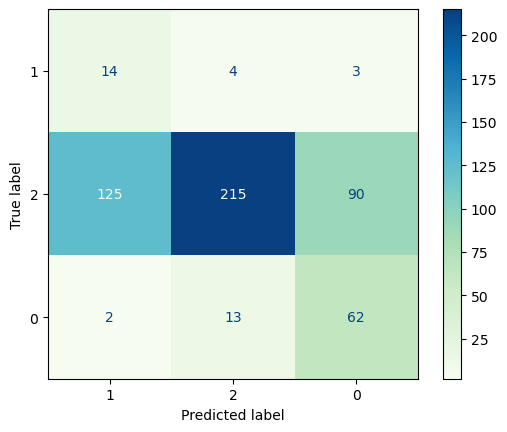

In [68]:
cm = confusion_matrix(y_test_2, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(data_frame2['quality']))
disp.plot(cmap='GnBu') 
plt.show()

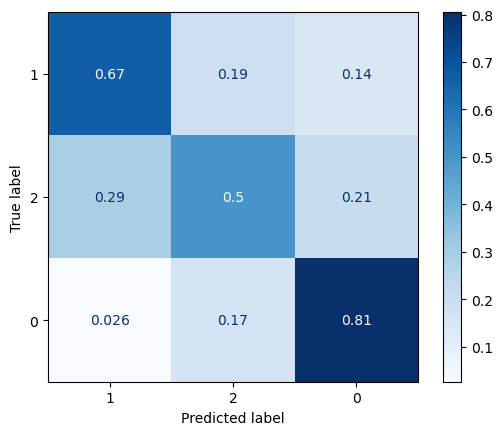

In [69]:
cm = confusion_matrix(y_test_2, y_pred_2, normalize='true') 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pd.unique(data_frame2['quality'])) 
disp.plot(cmap='Blues')

plt.show()

### ROC Curve for the second model

In [70]:
#use a LabelBinarizer to binarize the target by one-hot-encoding
label_binarizer_2 = LabelBinarizer().fit(y_train_2)
y_onehot_test_2 = label_binarizer_2.transform(y_test_2)
y_onehot_test_2.shape

(528, 3)

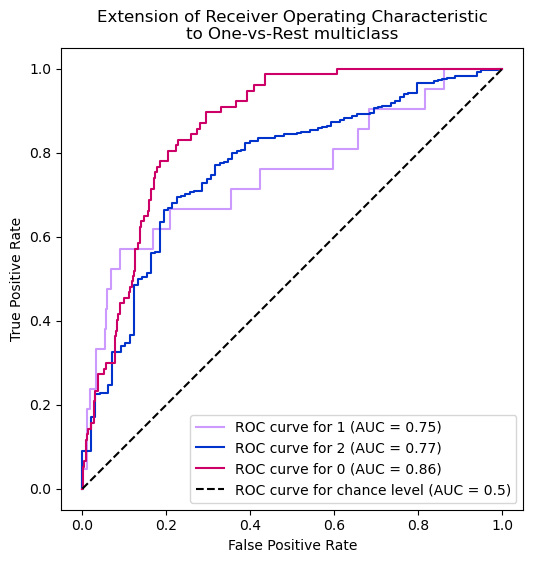

In [71]:
#plot ROC curve
fig, ax = plt.subplots(figsize=(6, 6))
y_score_2 = pipe_2.fit(X_train_2, y_train_2).predict_proba(X_test_2)
target_names_2 = pd.unique(data_frame2['quality'])
n_classes_2 = 3

colors = cycle(["#cc99ff", "#0033cc", "#cc0066"])
for class_id, color in zip(range(n_classes_2), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test_2[:, class_id],
        y_score_2[:, class_id],
        name=f"ROC curve for {target_names_2[class_id]}",
        color=color,
        ax=ax,
    )

    
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show() 

Classifiers that give curves closer to the top-left corner indicate a better performance, so in my model the best performance has the classifier is "0". The classifiers 1 and 2 have similar performance.
Compare AUC for the classifiers in the second model with the AUC for the classifiers in the first model for the 6 classes we can see that in the second model the best AUC value (0.86) is lower than the best AUC value in the first model (0.98).